In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CAPSTONE/translated_dataset.csv')
df = df.head(2225)
df

,id,teks,class
0,0,Mantan istri yang mengancam dengan raksasa say...,suicide
1,1,Apakah saya aneh saya tidak terpengaruh oleh p...,non-suicide
2,2,Akhirnya 2020 hampir berakhir ... jadi saya ti...,non-suicide
3,3,saya butuh bantuan hanya membantu saya saya me...,suicide
4,4,"Saya sangat losthello, nama saya Adam (16) dan...",suicide
...,...,...,...
2220,2261,Baru saja menemukan selembar perangko berwarna...,non-suicide
2221,2262,"Bosan merasa jelek, tidak diinginkan dan tidak...",suicide
2222,2263,Rekan kerja dan teman saya bunuh diri.Saya tid...,suicide
2223,2264,Saya pikir saya akan berhenti menonton Hentai ...,non-suicide


In [ ]:
import matplotlib.pyplot as plt

def plot_history(history):
    # Plot loss
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()


In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf

def suicide():
    df = pd.read_csv('/content/drive/MyDrive/CAPSTONE/translated_dataset.csv')
    df = df.head(2225)

    df['label'] = df['class'].apply(lambda x: 0 if x == 'non-suicide' else 1)

    vocab_size = 1000
    embedding_dim = 16
    max_length = 120
    trunc_type = 'post'
    padding_type = 'post'
    oov_tok = "<OOV>"
    training_portion = .8

    sentences = df['teks'].tolist()
    labels = df['label'].tolist()

    train_size = int(len(sentences) * training_portion)

    training_sentences = sentences[:train_size]
    training_labels = labels[:train_size]
    validation_sentences = sentences[train_size:]
    validation_labels = labels[train_size:]

    tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
    tokenizer.fit_on_texts(training_sentences)

    train_sequences = tokenizer.texts_to_sequences(training_sentences)
    training_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

    validation_sequences = tokenizer.texts_to_sequences(validation_sentences)
    validation_padded = pad_sequences(validation_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

    class myCallback(tf.keras.callbacks.Callback):
      def on_epoch_end(self, epoch, logs={}):
          accuracy = logs.get('accuracy')
          val_accuracy = logs.get('val_accuracy')
          if accuracy is not None and val_accuracy is not None:
              if logs.get('accuracy') > 0.90 and logs.get('val_accuracy')  > 0.85:
                  print("\n Stop training model...")
                  self.model.stop_training = True

    callbacks = myCallback()

    # Bangun model good
    # model = tf.keras.Sequential([
    #     tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    #     tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
    #     tf.keras.layers.GlobalMaxPool1D(),
    #     tf.keras.layers.Dropout(0.4),
    #     tf.keras.layers.Dense(1, activation='sigmoid')
    # ])

    # model = tf.keras.Sequential([
    #     tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    #     tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    #     tf.keras.layers.GlobalMaxPool1D(),
    #     tf.keras.layers.Dropout(0.2),
    #     tf.keras.layers.Dense(1, activation='sigmoid')
    # ])
    # Bangun model
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
        tf.keras.layers.GlobalMaxPool1D(),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    history=model.fit(training_padded, np.array(training_labels), epochs=15, validation_data=(validation_padded, np.array(validation_labels)), callbacks=[callbacks])
    plot_history(history)
    return model


Epoch 1/15
56/56 [==============================] - 11s 140ms/step - loss: 0.6274 - accuracy: 0.6910 - val_loss: 0.5512 - val_accuracy: 0.7483
Epoch 2/15
56/56 [==============================] - 4s 72ms/step - loss: 0.5302 - accuracy: 0.7309 - val_loss: 0.5652 - val_accuracy: 0.7101
Epoch 3/15
56/56 [==============================] - 2s 43ms/step - loss: 0.4404 - accuracy: 0.8163 - val_loss: 0.5010 - val_accuracy: 0.7865
Epoch 4/15
56/56 [==============================] - 2s 40ms/step - loss: 0.4089 - accuracy: 0.8444 - val_loss: 0.4990 - val_accuracy: 0.7955
Epoch 5/15
56/56 [==============================] - 2s 29ms/step - loss: 0.3994 - accuracy: 0.8500 - val_loss: 0.4721 - val_accuracy: 0.8135
Epoch 6/15
56/56 [==============================] - 2s 36ms/step - loss: 0.3530 - accuracy: 0.8792 - val_loss: 0.4579 - val_accuracy: 0.8404
Epoch 7/15
56/56 [==============================] - 2s 36ms/step - loss: 0.3914 - accuracy: 0.8517 - val_loss: 0.4231 - val_accuracy: 0.8404
Epoch 8/15


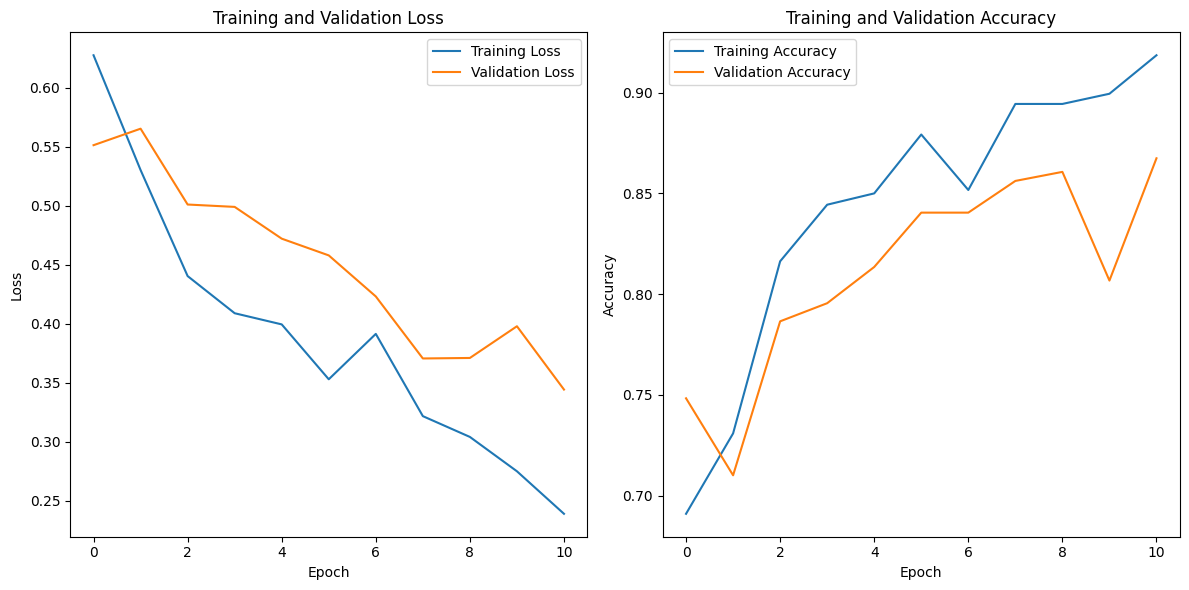

In [ ]:
if __name__ == '__main__':
    model = suicide()